# Classificador de árvore de decisão Binário 

### 1) Importar bibliotecas necessárias 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar o classificador de árvore de decisão 
from sklearn.model_selection import train_test_split # Importar a função que separa nos conjuntos de treinamento e teste
from sklearn import metrics # Importar o módulo de métricas para calculo da acurácia 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Importar a matrix de confusão

### 2) Classificando os dados 

In [2]:


# Carregando conjunto de dados 
pima = pd.read_csv("diabetes.csv")

# Nomes das colunas 
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3) Seleção de atributos 


In [3]:
# Divide o conjunto de dados em atributos e classes
atributo_col = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# Atributos
X = pima[atributo_col]

# Classes
y = pima.label

### 4) Separando os dados 


In [4]:
# Separando os dados em conjuntos de treino e teste - 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 5) Construindo o modelo da árvore de decisão 

In [5]:
# Cria um objeto de classificador de árvore de decisão 
clf = DecisionTreeClassifier()

# Treina o classificador de árvore de decisão 
clf = clf.fit(X_train,y_train)

# Prevê a resposta para o conjunto de dados de teste 
y_pred = clf.predict(X_test)

### 6) Matriz de confusão 
A matriz de confusão  por definição é uma tabela que permite visualizar aonde os erros do modelo são cometidos.
No scikit learn por definição a matriz de confusão para duas classes é impressa como abaixo

<img src = "CM.png">

Onde: 

    .TP - True Positive (Verdadeiro Positivo): O sistema previu como verdadeiro e era verdadeiro 

    .FP - False Positive (Falso Positivo): O sistema previu como falso e era veradadeiro 

    .TN - True Negative (Verdadeiro Positivo): O sistema previu como falso e era falso 
    
    .FN = False negative (Falso negativo): O sistema previu como false e era verdadeiro 




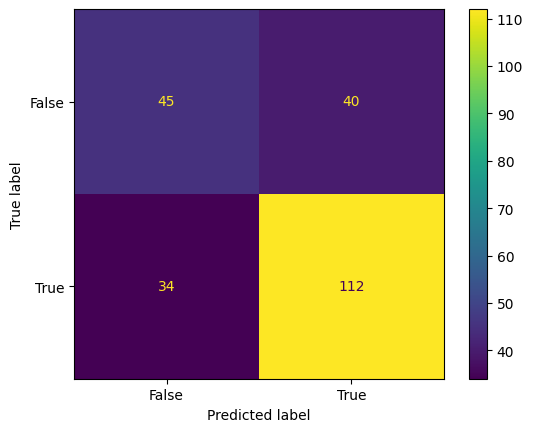

In [6]:

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
# Matriz de confusão do modelo 
ConfusionMatrixDisplay(cm, display_labels = [False, True]).plot()





#### 6.1) Acurácia 
Mede com que frequência o modelo está correto 

In [7]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.6796536796536796


#### 6.2) Precisão
Dos previstos certo, qual a porcentagem de verdadeiros?



In [8]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.569620253164557


#### 6.3) Sensibilidade 
De todos os casos positivos, qual porcentagem foi prevista corretamente?

Sensibilidade (Recall) mede quão bem o modelo prevê os positivos. Ou seja, olha os verdadeiros positivos e falsos negativos (que são positivos que foram previstos como falsos).

In [9]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.5294117647058824


#### 6.4) Especificidade
Quão bem o modelo está prevendo resultados negativos? Especificidade é similar a sensibilidade, mas ele olha o modelo a partir dos resusltados negatuvos (inverso da sensibilidade)

In [10]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.7671232876712328


#### F-score 
É a média harmônica da precisão e da sensibilidade 
Ele considera ambos casos falsos positivos e falsos negativos e ë bom para conjunto de dados desbalanceados. 

In [11]:
F1_score = metrics.f1_score(y_test, y_pred)
print(F1_score)

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

0.5487804878048781
{'Accuracy': 0.6796536796536796, 'Precision': 0.569620253164557, 'Sensitivity_recall': 0.5294117647058824, 'Specificity': 0.7671232876712328, 'F1_score': 0.5487804878048781}
